# 2.2. [**Apprentissage des variétés**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/2_2_manifold.ipynb)</br>([*Manifold learning*](https://scikit-learn.org/stable/modules/manifold.html))

<i>Cherchez l'essentiel<br/>
Les simples choses essentielles<br/>
Oubliez vos soucis et vos tracas<br/>
Je veux dire l'essentiel<br/>
Les recettes de Mère Nature<br/>
Celles qui apportent les choses essentielles de la vie<br/></i>


Chanson de Baloo [Le livre de la jungle]


<img alt="https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_001.png" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_001.png" style="width: 420.0px; height: 420.0px;" />
<br/>
<img alt="manifold_img3" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_003.png" style="width: 180.0px; height: 180.0px;" />

<img alt="manifold_img4" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_004.png" style="width: 180.0px; height: 180.0px;" />

<img alt="manifold_img5" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_005.png" style="width: 180.0px; height: 180.0px;" />

<img alt="manifold_img6" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_006.png" style="width: 180.0px; height: 180.0px;" />

L'apprentissage des variétés est une approche de réduction de la dimensionnalité non linéaire. Les algorithmes pour cette tâche sont basés sur l'idée que la dimensionnalité de nombreux ensembles de données est artificiellement élevée.

## <a id='introduction'></a> 2.2.1. Introduction

Les ensembles de données de grande dimension peuvent être très difficiles à visualiser. Bien que les données en deux ou trois dimensions puissent être représentées graphiquement pour montrer la structure inhérente des données, les graphiques équivalents en haute dimension sont beaucoup moins intuitifs. Pour faciliter la visualisation de la structure d'un ensemble de données, la dimension doit être réduite d'une manière ou d'une autre.

La manière la plus simple de réaliser cette réduction de dimensionnalité est de prendre une projection aléatoire des données. Bien que cela permette une certaine visualisation de la structure des données, le caractère aléatoire du choix laisse beaucoup à désirer. Dans une projection aléatoire, il est probable que la structure la plus intéressante des données sera perdue.

<img alt="digits_img" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_001.png" style="width: 300.0px; height: 300.0px;" /><img alt="projected_img" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_002.png" style="width: 320.0px; height: 240.0px;" />

Pour répondre à cette préoccupation, plusieurs cadres de réduction de la dimensionnalité linéaires supervisés et non supervisés ont été conçus, tels que l'Analyse en Composantes Principales (PCA), l'Analyse en Composantes Indépendantes, l'Analyse Discriminante Linéaire et d'autres encore. Ces algorithmes définissent des rubriques spécifiques pour choisir une projection linéaire "intéressante" des données. Ces méthodes peuvent être puissantes, mais passent souvent à côté d'importantes structures non linéaires dans les données.

<img alt="PCA_img" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_003.png" style="width: 320.0px; height: 240.0px;" /><img alt="LDA_img" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_004.png" style="width: 320.0px; height: 240.0px;" />

L'apprentissage de variété (Manifold Learning) peut être considéré comme une tentative de généraliser les cadres linéaires tels que PCA pour être sensibles à la structure non linéaire des données. Bien que des variantes supervisées existent, le problème d'apprentissage de variété typique est non supervisé : il apprend la structure multidimensionnelle des données à partir des données elles-mêmes, sans l'utilisation de classifications prédéterminées.

Les implémentations d'apprentissage de variété disponibles dans scikit-learn sont résumées ci-dessous.

### Exemples

#### [**Apprentissage par variétés sur chiffres manuscrits : Locally Linear Embedding, Isomap…**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_2_manifold/plot_lle_digits.ipynb)<br/>([*Manifold learning on handwritten digits: Locally Linear Embedding, Isomap…*](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html))

Exemple de réduction de dimensionnalité sur des chiffres manuscrits.

#### [**Comparaison des méthodes d'apprentissage de variétés**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_2_manifold/plot_compare_methods.ipynb)<br/>([*Comparison of Manifold Learning methods*](https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html))

Exemple de réduction de dimensionnalité sur un jeu de données de "S-curve".

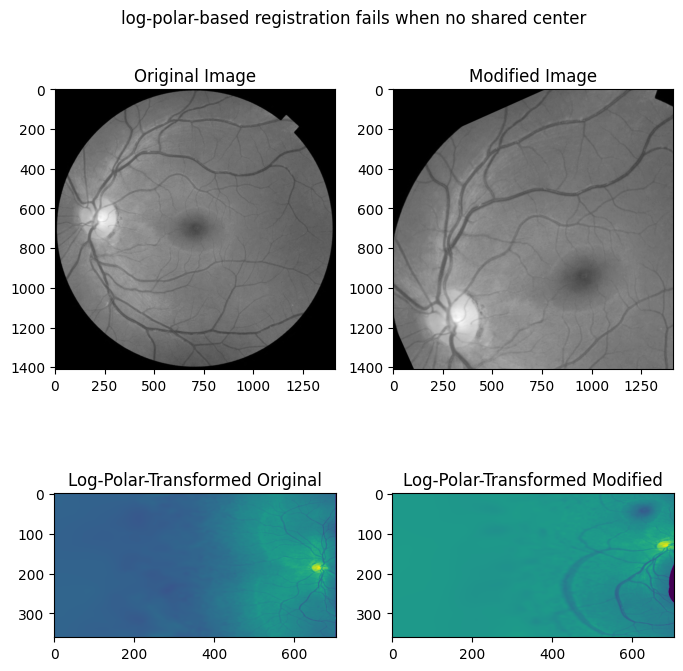

Expected value for cc rotation in degrees: 24
Recovered value for cc rotation: -167.55

Expected value for scaling difference: 1.4
Recovered value for scaling difference: 25.110458986143573


In [ ]:
from skimage.color import rgb2gray
from skimage.filters import window, difference_of_gaussians
from scipy.fft import fft2, fftshift

angle = 24
scale = 1.4
shiftr = 30
shiftc = 15

image = rgb2gray(data.retina())
translated = image[shiftr:, shiftc:]
rotated = rotate(translated, angle)
rescaled = rescale(rotated, scale)
sizer, sizec = image.shape
rts_image = rescaled[:sizer, :sizec]

# When center is not shared, log-polar transform is not helpful!
radius = 705
warped_image = warp_polar(image, radius=radius, scaling="log")
warped_rts = warp_polar(rts_image, radius=radius, scaling="log")
shifts, error, phasediff = phase_cross_correlation(warped_image, warped_rts,
                                                   upsample_factor=20,
                                                   normalization=None)
shiftr, shiftc = shifts[:2]
klog = radius / np.log(radius)
shift_scale = 1 / (np.exp(shiftc / klog))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original Image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("Modified Image")
ax[1].imshow(rts_image, cmap='gray')
ax[2].set_title("Log-Polar-Transformed Original")
ax[2].imshow(warped_image)
ax[3].set_title("Log-Polar-Transformed Modified")
ax[3].imshow(warped_rts)
fig.suptitle('log-polar-based registration fails when no shared center')
plt.show()

print(f'Expected value for cc rotation in degrees: {angle}')
print(f'Recovered value for cc rotation: {shiftr}')
print()
print(f'Expected value for scaling difference: {scale}')
print(f'Recovered value for scaling difference: {shift_scale}')

## <a id='isomap'></a> 2.2.2. Isomap

L'une des premières approches de la réduction de dimensionnalité de type *apprentissage des variétés* est l'algorithme Isomap, abréviation de Isometric Mapping. Isomap peut être considéré comme une extension du Multi-dimensional Scaling (MDS) ou du Kernel PCA. Isomap cherche à projeter les données dans un espace de plus basse dimension qui préserve les distances géodésiques entre tous les points. Isomap peut être exécuté à l'aide de l'objet [**`Isomap`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html).

### 2.2.2.1. Complexité

L'algorithme Isomap se compose de trois étapes :

1. **Recherche des voisins les plus proches.** Isomap utilise [**`BallTree`**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html) pour une recherche efficace des voisins. Le coût est d'environ $\mathcal{O}[D \log(k) N \log(N)]$, pour les $k$ voisins les plus proches de $N$ points dans $D$ dimensions.
2. **Recherche du graphe de plus courts chemins.** Les algorithmes les plus efficaces connus pour cela sont l'*algorithme de Dijkstra*, qui est d'environ $\mathcal{O}[N^2(k + \log(N))]$, ou l'algorithme de Floyd-Warshall, qui est $\mathcal{O}[N^3]$. L'algorithme peut être sélectionné par l'utilisateur avec le mot-clé `path_method` d'`Isomap`. S'il n'est pas spécifié, le code tente de choisir le meilleur algorithme en fonction des données d'entrée.
3. **Décomposition partielle des valeurs propres.** La projection des données est encodée dans les vecteurs propres correspondant aux $d$ plus grandes valeurs propres du noyau isomap $N \times N$. Pour un solveur dense, le coût est d'environ $\mathcal{O}[d N^2]$. Ce coût peut souvent être amélioré en utilisant le solveur `ARPACK`. Le solveur de valeurs propres peut être spécifié par l'utilisateur avec le mot-clé `eigen_solver` d'`Isomap`. Si non spécifié, le code tente de choisir le meilleur algorithme pour les données d'entrée.

La complexité globale d'Isomap est $\mathcal{O}[D \log(k) N \log(N)] + \mathcal{O}[N^2(k + \log(N))] + \mathcal{O}[d N^2]$.

* $N$ : nombre de points de données d'entraînement
* $D$ : dimension d'entrée
* $k$ : nombre de voisins les plus proches
* $d$ : dimension de sortie

#### Références

[“**A global geometric framework for nonlinear dimensionality reduction**](https://www.science.org/doi/10.1126/science.290.5500.2319)[”](https://drive.google.com/file/d/1O1La5-3gEhlpmgVZot2LcZmdkl9cIv3w/view?usp=share_link) Tenenbaum, J.B.; De Silva, V.; & Langford, J.C. Science 290 (5500) PMID: 11125149 DOI: 10.1126/science.290.5500.2319

## <a id='locally-linear-embedding'></a> 2.2.3. Incorporation localement linéaire

Locally Linear Embedding (LLE) cherche une projection de données de dimension inférieure qui préserve les distances dans les quartiers locaux. On peut le considérer comme une série d'analyses en composantes principales locales qui sont comparées globalement pour trouver la meilleure intégration non linéaire.

L'incorporation localement linéaire peut être effectuée avec la fonction [**`locally_linear_embedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html) ou son homologue orienté objet [**`LocallyLinearEmbedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html).

<img alt="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_006.png" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_006.png" style="width: 320.0px; height: 240.0px;"/>

### 2.2.3.1. Complexité

L'algorithme LLE standard comporte trois étapes :
1. **Recherche des plus proches voisins.** Voir la discussion sous Isomap ci-dessus.
2. **Construction de la matrice de pondération.** $\mathcal{O}[D N k^3]$. La construction de la matrice de pondération LLE implique la solution d'une équation linéaire $k \times $ pour chacun des $N$ voisinages locaux.
3. **Décomposition partielle des valeurs propres.** Voir la discussion sous Isomap ci-dessus.

La complexité globale de la LLE standard est $\mathcal{O}[D \log(k) N \log(N)] + \mathcal{O}[D N k^3] + \mathcal{O}[d N^2]$.
* $N$ : nombre de points de données d'entraînement
* $D$ : dimension d'entrée
* $k$ : nombre de plus proches voisins
* $d$ : dimension de sortie

#### Références

[“**Nonlinear dimensionality reduction by locally linear embedding**](https://www.science.org/doi/10.1126/science.290.5500.2323)[”](https://drive.google.com/file/d/1bLGwpuA7jnoYqF4W5PkooZwAyhrZN7d9/view?usp=share_link) Roweis, S. & Saul, L. Science 290:2323 (2000) DOI:10.1126/SCIENCE.290.5500.2323Corpus ID: 5987139

## <a id='modified-locally-linear-embedding'></a> 2.2.4. Incorporation localement linéaire modifiée

Un problème bien connu avec LLE est le problème de régularisation. Lorsque le nombre de voisins est supérieur au nombre de dimensions d'entrée, la matrice définissant chaque voisinage local est de rang défectueux. Pour remédier à cela, LLE standard applique un paramètre de régularisation arbitraire $r$, qui est choisi par rapport à la trace de la matrice locale de poids. Bien qu'il puisse être démontré formellement qu'à mesure que $r \to 0$, la solution converge vers l'incorporation souhaitée, il n'y a aucune garantie que la solution optimale sera trouvée pour $r > 0$. Ce problème se manifeste dans les incorporations qui déforment la géométrie sous-jacente de la variété.

Une méthode pour résoudre le problème de régularisation consiste à utiliser plusieurs vecteurs de poids dans chaque voisinage. C'est l'essence de *l'incorporation localement linéaire modifiée* (MLLE). MLLE peut être effectué avec la fonction [**`locally_linear_embedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html) ou son homologue orienté objet [**`LocallyLinearEmbedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html), avec le mot-clé  `method='modified'`. Cela nécessite `n_neighbors > n_components`.

<img alt="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_007.png" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_007.png" style="width: 320.0px; height: 240.0px;" />

### 2.2.4.1. Complexité

L'algorithme MLLE comprend trois étapes :
1. **Recherche des plus proches voisins.** Identique à celle de la LLE standard.
2. **Construction de la matrice de poids.** Environ $\mathcal{O}[D N k^3] + \mathcal{O}[N (k-D) k^2]$. Le premier terme est exactement équivalent à celui de la LLE standard. Le deuxième terme a à voir avec la construction de la matrice de poids à partir de plusieurs poids. En pratique, le coût supplémentaire de la construction de la matrice de poids de la MLLE est négligeable par rapport au coût des étapes 1 et 3.
3. **Décomposition partielle des valeurs propres.** Identique à celle de la LLE standard.

La complexité globale de MLLE est $\mathcal{O}[D \log(k) N \log(N)] + \mathcal{O}[D N k^3] + \mathcal{O}[N (k-D) k^2] + \mathcal{O}[d N^2]$.
* $N$ : nombre de points de données d'entraînement
* $D$ : dimension d'entrée
* $k$ : nombre de plus proches voisins
* $d$ : dimension de sortie

#### Références

[“**MLLE: Modified Locally Linear Embedding Using Multiple Weights**](https://citeseerx.ist.psu.edu/doc_view/pid/0b060fdbd92cbcc66b383bcaa9ba5e5e624d7ee3)[”](https://drive.google.com/file/d/1u28tZprjY5Hj2dn4eUHlIACutnbolZMo/view?usp=share_link) Zhang, Z. & Wang, J. DOI:10.7551/mitpress/7503.003.0204Corpus ID: 15481825

## <a id='hessian-eigenmapping'></a> 2.2.5. Hessian Eigenmapping

L'Hessian Eigenmapping (également connu sous le nom de LLE basé sur le Hessien : HLLE) est une autre méthode pour résoudre le problème de régularisation de LLE. Cette méthode repose sur une forme quadratique basée sur le Hessien au niveau de chaque voisinage, qui est utilisée pour récupérer la structure localement linéaire. Bien que d'autres implémentations notent que cette méthode ne se met pas bien à l'échelle avec la taille des données, `sklearn` implémente certaines améliorations algorithmiques qui rendent son coût comparable à celui d'autres variantes de LLE pour une petite dimension de sortie. HLLE peut être effectué avec la fonction [**`locally_linear_embedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html) ou son équivalent orienté objet [**`LocallyLinearEmbedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html), avec le mot-clé `method='hessian'`. Il nécessite `n_neighbors > n_components * (n_components + 3) / 2`.

<img alt="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_008.png" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_008.png" style="width: 320.0px; height: 240.0px;" />

### 2.2.5.1. Complexité

L'algorithme HLLE comprend trois étapes :
1. **Recherche des plus proches voisins.** Identique à celle de la LLE standard.
2. **Construction de la matrice de poids.** Environ $\mathcal{O}[D N k^3] + \mathcal{O}[N d^6]$. Le premier terme est exactement équivalent à celui de la LLE standard. Le deuxième terme a à voir avec la décomposition QR de l'estimateur hessien local.
3. **Décomposition partielle des valeurs propres.** Identique à celle de la LLE standard.

La complexité globale de MLLE est $\mathcal{O}[D \log(k) N \log(N)] + \mathcal{O}[D N k^3] + \mathcal{O}[N d^6] + \mathcal{O}[d N^2]$.
* $N$ : nombre de points de données d'entraînement
* $D$ : dimension d'entrée
* $k$ : nombre de plus proches voisins
* $d$ : dimension de sortie

#### Références

[“**Hessian Eigenmaps: Locally linear embedding techniques for high-dimensional data**](https://www.pnas.org/doi/10.1073/pnas.1031596100)[”](https://drive.google.com/file/d/1QDsM5lUYYXGta8hGLsiAKWNcoAI8q2Nx/view?usp=share_link) Donoho, D. & Grimes, C. Proc Natl Acad Sci USA. 100:5591 (2003)

## <a id='spectral-embedding'></a> 2.2.6. Intégration spectrale

L'intégration spectrale est une approche de calcul d'une intégration non linéaire. Scikit-learn implémente Laplacian Eigenmaps, qui trouve une représentation de faible dimension des données en utilisant une décomposition spectrale du Laplacien de graphe. Le graphe généré peut être considéré comme une approximation discrète de la variété de faible dimension dans l'espace de grande dimension. La minimisation d'une fonction de coût basée sur le graphe garantit que les points proches les uns des autres sur la variété sont cartographiés à proximité les uns des autres dans l'espace de faible dimension, préservant les distances locales. L'intégration spectrale peut être effectuée avec la fonction [**`spectral_embedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.spectral_embedding.html) ou son homologue orienté objet [**`SpectralEmbedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html).

### 2.2.6.1. Complexité

L'algorithme d'intégration spectrale (Laplacian Eigenmaps) comprend trois étapes :
* **Construction d'un graphe pondéré.** Transformer les données brutes d'entrée en une représentation de graphe à l'aide d'une matrice d'affinité (d'adjacence).
* **Construction du Laplacien du graphe.** Le Laplacien du graphe non normalisé est construit comme $L = D - A$, et le Laplacien normalisé comme $L = D^{-\frac{1}{2}} (D - A) D^{-\frac{1}{2}}$.
* **Décomposition partielle des valeurs propres.** Une décomposition des valeurs propres est effectuée sur le Laplacien du graphe.

La complexité globale de l'intégration spectrale est $\mathcal{O}[D \log(k) N \log(N)] + \mathcal{O}[D N k^3] + \mathcal{O}[d N^2]$.
* $N$ : nombre de points de données d'entraînement
* $D$ : dimension d'entrée
* $k$ : nombre de plus proches voisins
* $d$ : dimension de sortie

#### Références

[“**Laplacian Eigenmaps for Dimensionality Reduction and Data Representation**](https://web.cse.ohio-state.edu/~belkin.8/papers/LEM_NC_03.pdf)[”](https://drive.google.com/file/d/1Ap41yNxmeAkz1qn_P8jpTaEnTcO0d3h9/view?usp=share_link) M. Belkin, P. Niyogi, Neural Computation, June 2003; 15 (6):1373-1396

## <a id='local-tangent-space-alignment'></a> 2.2.7. Alignement de l'espace tangent local

Bien que n'étant pas techniquement une variante de LLE, l'alignement de l'espace tangent local (LTSA) est suffisamment similaire sur le plan algorithmique à LLE pour pouvoir être inclus dans cette catégorie. Au lieu de se concentrer sur la préservation des distances entre les voisins comme dans LLE, LTSA cherche à caractériser la géométrie locale de chaque voisinage via son espace tangent, et effectue une optimisation globale pour aligner ces espaces tangents locaux afin d'apprendre l'incrustation. LTSA peut être effectué avec la fonction [**`locally_linear_embedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html) ou son homologue orienté objet [**`LocallyLinearEmbedding`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html), avec le mot clé `method = 'ltsa'`.

<img alt="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_009.png" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_009.png" style="width: 320.0px; height: 240.0px;" />


### 2.2.7.1. Complexité

L'algorithme LTSA comprend trois étapes :
* **Recherche des voisins les plus proches.** Identique à LLE standard.
* **Construction de la matrice de poids.** Environ $\mathcal{O}[D N k^3] + \mathcal{O}[k^2 d]$. Le premier terme reflète un coût similaire à celui de LLE standard.
* **Décomposition partielle des valeurs propres.** Identique à LLE standard.

La complexité globale du LTSA standard est $\mathcal{O}[D \log(k) N \log(N)] + \mathcal{O}[D N k^3] + \mathcal{O}[k^2 d] + \mathcal{O}[d N^2]$.
* $N$ : nombre de points de données d'entraînement
* $D$ : dimension d'entrée
* $k$ : nombre de plus proches voisins
* $d$ : dimension de sortie

#### Références

[“**Principal manifolds and nonlinear dimensionality reduction via tangent space alignment**](https://arxiv.org/abs/cs/0212008)[”](https://drive.google.com/file/d/1VLFHVvkLFlDiCOm3qzH3SNZ6Itojdz2g/view?usp=share_link) Zhang, Z. & Zha, H. Journal of Shanghai Univ. 8:406 (2004)

## <a id='multi-dimensional-scaling-mds'></a> 2.2.8. Analyse en dimensions multiples (ADM)

L'[**analyse en dimensions multiples (ADM)**](https://en.wikipedia.org/wiki/Multidimensional_scaling) (*Multi-dimensional Scaling (MDS)* en anglais) implémentée par la classe [**`MDS`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) vise à trouver une représentation de basse dimension des données dans laquelle les distances respectent bien les distances de l'espace d'origine à haute dimension.

En général, [**`MDS`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) est une technique utilisée pour analyser des données de similarité ou de dissimilarité. Elle tente de modéliser ces données comme des distances dans un espace géométrique. Les données peuvent être des évaluations de similarité entre des objets, des fréquences d'interaction entre des molécules ou des indices commerciaux entre des pays.

Il existe deux types d'algorithmes ADM : métriques et non métriques. Dans scikit-learn, la classe [**`MDS`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) implémente les deux. Dans MDS métrique, la matrice de similarité d'entrée provient d'une métrique (et respecte donc l'inégalité triangulaire), les distances entre les deux points de sortie sont alors définies pour être aussi proches que possible des données de similarité ou de dissimilarité. Dans la version non métrique, les algorithmes essaieront de préserver l'ordre des distances et chercheront donc une relation monotone entre les distances dans l'espace intégré et les similarités/dissimilarités.

<img alt="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_010.png" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_010.png" style="width: 320.0px; height: 240.0px;" />

Soit $S$ la matrice de similarité et $X$ les coordonnées des $n$ points d'entrée. Les disparités $\hat{d}_{ij}$ sont des transformations des similarités choisies de manière optimale. L'objectif, appelé stress, est alors défini par $\sum_{i < j} d_{ij}(X) - \hat{d}_{ij}(X)$.

### 2.2.8.1. ADM non métrique

Dans le modèle ADM métrique le plus simple, appelé *ADM absolu*, les disparités sont définies par $\hat{d}_{ij}=S_{ij}$. Avec l''ADM absolu, la valeur $S_{ij}$ doit alors correspondre exactement à la distance entre les points $i$ et $j$ dans le point d'intégration.

Le plus souvent, les disparités sont fixées à $\hat{d}_{ij}=bS_{ij}$.

### 2.2.8.2. ADM non métrique

Le [**`MDS`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) non métrique se concentre sur l'ordination des données. Si $S_{ij} > S_{jk}$, alors l'intégration doit assurer $d_{ij} <> d_{jk}$. Pour cette raison, nous en parlons en termes de dissemblances ($\delta_{ij}$) au lieu de similitudes ($S_{ij}$). Notez que les dissemblances peuvent facilement être obtenues à partir de similitudes par une simple transformation, par ex. $\delta_{ij}=c_1-c_2 S_{ij}$ pour certaines constantes réelles $c_1, c_2$. Un algorithme simple pour appliquer une bonne ordination consiste à utiliser une régression monotone de $d_{ij}$ sur $\delta_{ij}$, produisant des disparités $\hat{d}_{ij}$ dans le même ordre que $\delta_{ij}$.

Une solution triviale à ce problème consiste à définir tous les points sur l'origine. Pour éviter cela, les disparités $\hat{d}_{ij}$ sont normalisés. Notez que puisque nous ne nous soucions que de l'ordre relatif, notre objectif devrait être invariant à la traduction et à la mise à l'échelle simples, mais la contrainte utilisée dans les MDS métriques est sensible à la mise à l'échelle. Pour résoudre ce problème, les MDS non métriques peuvent utiliser une contrainte normalisée, connue sous le nom de Stress-1 définie comme

$$
\sqrt{\frac{\sum_{i < j} (d_{ij} - \hat{d}_{ij})^2}{\sum_{i < j} d_{ij}^2}}.
$$

L'utilisation de Stress-1 normalisé peut être activée en définissant `normalized_stress=True`, mais elle n'est compatible qu'avec le problème MDS non métrique et sera ignorée dans le cas métrique.


<img alt="https://scikit-learn.org/stable/_images/sphx_glr_plot_mds_001.png" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_mds_001.png" style="width: 384.0px; height: 288.0px;" />

#### Références

* [“**Modern Multidimensional Scaling - Theory and Applications**](https://link.springer.com/book/10.1007/0-387-28981-X)[”](https://drive.google.com/file/d/1VkI6hCu7jD53IUf8e0l2XRZp-Hbmw60j/view?usp=share_link) Borg, I.; Groenen P. Springer Series in Statistics (1997)
* [“**Nonmetric multidimensional scaling: a numerical method**](http://cda.psych.uiuc.edu/psychometrika_highly_cited_articles/kruskal_1964b.pdf)[”](https://drive.google.com/file/d/1MJmlG36RbYf0ZFwB-1t9SB6fHTvJsWEW/view?usp=share_link) Kruskal, J. Psychometrika, 29 (1964)
* [“**Multidimensional scaling by optimizing goodness of fit to a nonmetric hypothesis**](http://cda.psych.uiuc.edu/psychometrika_highly_cited_articles/kruskal_1964a.pdf)[”](https://drive.google.com/file/d/1jXd7szGJr73654L075ZG52BgiFCPqckW/view?usp=share_link) Kruskal, J. Psychometrika, 29, (1964)

## <a id='t-distributed-stochastic-neighbor-embedding-t-sne'></a> 2.2.9. Algorithme t-SNE

t-SNE ([**`TSNE`**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) convertit les affinités des points de données en probabilités. Les affinités dans l'espace d'origine sont représentées par des probabilités conjointes gaussiennes et les affinités dans l'espace intégré sont représentées par des distributions t de Student. Cela permet à t-SNE d'être particulièrement sensible à la structure locale et présente quelques avantages par rapport aux techniques existantes :
* Révéler la structure à de nombreuses échelles sur une seule carte
* Révéler les données qui se trouvent dans plusieurs variétés ou clusters différents
* Réduire la tendance à regrouper les points au centre

Alors qu'Isomap, LLE et ses variantes sont les mieux adaptées pour déployer une seule variété continue de basse dimension, t-SNE se concentrera sur la structure locale des données et aura tendance à extraire des groupes locaux de points regroupés comme cela est mis en évidence sur l'exemple de la courbe en S. Cette capacité à regrouper des échantillons en fonction de la structure locale peut être bénéfique pour déterminer visuellement un ensemble de données qui comprend plusieurs variétés en même temps, comme c'est le cas dans le jeu de données de chiffres.

La divergence de Kullback-Leibler (KL) des probabilités conjointes dans l'espace d'origine et l'espace intégré sera minimisée par descente de gradient. Notez que la divergence KL n'est pas convexe, c'est-à-dire que plusieurs redémarrages avec des initialisations différentes aboutiront à des minima locaux de la divergence KL. Il est donc parfois utile d'essayer différentes graines et de sélectionner l'intégration avec la plus faible divergence KL.

Les inconvénients de l'utilisation de t-SNE sont dans les grandes lignes :
* t-SNE est coûteux en termes de calcul et peut prendre plusieurs heures sur des ensembles de données de millions d'échantillons où PCA se termine en quelques secondes ou minutes.
* La méthode de Barnes-Hut t-SNE est limitée aux intégrations bidimensionnelles ou tridimensionnelles.
* L'algorithme est stochastique et plusieurs redémarrages avec des graines différentes peuvent donner des intégrations différentes. Cependant, il est tout à fait légitime de choisir l'intégration avec l'erreur la plus faible.
* La structure globale n'est pas explicitement préservée. Ce problème est atténué par l'initialisation des points avec PAC (en utilisant `init='pca'`).

<img alt="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_013.png" src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_013.png" style="width: 320.0px; height: 240.0px;" />

### 2.2.9.1. Optimisation de t-SNE

Le but principal de t-SNE est la visualisation de données de haute dimension. Il fonctionne donc mieux lorsque les données seront intégrées sur deux ou trois dimensions.

L'optimisation de la divergence KL peut parfois être un peu délicate. Il existe cinq paramètres qui contrôlent l'optimisation de t-SNE et donc potentiellement la qualité de l'intégration résultante :
* perplexité
* facteur d'exagération précoce
* taux d'apprentissage
* nombre maximum d'itérations
* angle (non utilisé dans la méthode exacte)

La perplexité est définie comme $k = 2^{(S)}$ où $S$ est l'entropie de Shannon de la distribution de probabilité conditionnelle. La perplexité d'un dé à $k$ faces est $k$, de sorte que $k$ est effectivement le nombre de voisins les plus proches que t-SNE considère lors de la génération des probabilités conditionnelles. Des perplexités plus élevées conduisent à plus de voisins les plus proches et sont moins sensibles aux petites structures. À l'inverse, une perplexité plus faible considère un nombre plus petit de voisins, et ignore donc plus d'informations globales en faveur du voisinage local. À mesure que les tailles des ensembles de données augmentent, plus de points seront nécessaires pour obtenir un échantillon raisonnable du voisinage local, et des perplexités plus élevées peuvent donc être nécessaires. De même, des ensembles de données plus bruyants nécessiteront des valeurs de perplexité plus élevées pour englober suffisamment de voisins locaux pour voir au-delà du bruit de fond.

Le nombre maximum d'itérations est généralement suffisamment élevé et n'a pas besoin d'être ajusté. L'optimisation se compose de deux phases : la phase d'exagération précoce et l'optimisation finale. Pendant l'exagération précoce, les probabilités jointes dans l'espace d'origine seront artificiellement augmentées par multiplication par un facteur donné. Des facteurs plus élevés entraînent des écarts plus importants entre les clusters naturels dans les données. Si le facteur est trop élevé, la divergence KL pourrait augmenter pendant cette phase. En général, il n'a pas besoin d'être ajusté. Un paramètre critique est le taux d'apprentissage. S'il est trop faible, la descente de gradient restera bloquée dans un minimum local mauvais. S'il est trop élevé, la divergence KL augmentera pendant l'optimisation. Une heuristique suggérée dans Belkina et al. (2019) est de définir le taux d'apprentissage sur la taille de l'échantillon divisée par le facteur d'exagération précoce. Nous implémentons cette heuristique en tant qu'argument `learning_rate='auto'`. D'autres conseils peuvent être trouvés dans la FAQ de Laurens van der Maaten (voir références). Le dernier paramètre, l'angle, est un compromis entre la performance et la précision. Des angles plus grands impliquent que nous pouvons approximer des régions plus grandes par un seul point, ce qui conduit à une meilleure vitesse mais à des résultats moins précis.

[“**How to Use t-SNE Effectively**”](https://distill.pub/2016/misread-tsne/) fournit une bonne discussion sur les effets des différents paramètres, ainsi que des graphiques interactifs pour explorer les effets de différents paramètres.

### Barnes-Hut t-SNE

La méthode Barnes-Hut t-SNE qui a été mise en œuvre ici est généralement beaucoup plus lente que les autres algorithmes d'apprentissage de la structure des données. L'optimisation est assez difficile et le calcul du gradient est de l'ordre de $\mathcal{O}[d N log(N)]$, où $d$ est le nombre de dimensions de sortie et $N$ est le nombre d'échantillons. La méthode Barnes-Hut améliore la méthode exacte, où la complexité de t-SNE est de l'ordre de $\mathcal{O}[d N^2]$, mais présente plusieurs autres différences notables :
* L'implémentation de Barnes-Hut ne fonctionne que lorsque la dimensionnalité cible est de 3 ou moins. Le cas en 2D est typique lors de la construction de visualisations.
* Barnes-Hut ne fonctionne qu'avec des données d'entrée denses. Les matrices de données creuses ne peuvent être intégrées qu'avec la méthode exacte ou peuvent être approchées par une projection dense à faible rang, par exemple en utilisant [**`TruncatedSVD`**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).
* Barnes-Hut est une approximation de la méthode exacte. L'approximation est paramétrée avec le paramètre d'angle, donc le paramètre d'angle n'est pas utilisé lorsque `method="exact"`.
* Barnes-Hut est nettement plus scalable. Barnes-Hut peut être utilisé pour intégrer des centaines de milliers de points de données alors que la méthode exacte ne peut traiter que des milliers d'échantillons avant de devenir computationnellement intractable.

Pour les fins de visualisation (qui est le principal cas d'utilisation de t-SNE), l'utilisation de la méthode Barnes-Hut est fortement recommandée. La méthode t-SNE exacte est utile pour vérifier les propriétés théoriques de l'intégration, éventuellement dans un espace de dimension supérieure, mais elle est limitée aux petits ensembles de données en raison de contraintes de calcul.

Il convient également de noter que les étiquettes de chiffres correspondent approximativement au regroupement naturel trouvé par t-SNE, tandis que la projection linéaire en 2D du modèle PCA donne une représentation où les régions d'étiquettes se chevauchent largement. Cela indique clairement que ces données peuvent être bien séparées par des méthodes non linéaires qui se concentrent sur la structure locale (par exemple, une SVM avec un noyau RBF gaussien). Cependant, le fait de ne pas visualiser des groupes homogènes bien séparés avec t-SNE en 2D n'implique pas nécessairement que les données ne peuvent pas être correctement classées par un modèle supervisé. Il se peut que 2 dimensions ne soient pas suffisantes pour représenter avec précision la structure interne des données.

#### Références

* [“**Visualizing High-Dimensional Data Using t-SNE**](https://jmlr.org/papers/v9/vandermaaten08a.html)[”](https://drive.google.com/file/d/1Q89rllRipYMKaQEK4FAlUjdZytE76OSa/view?usp=share_link) van der Maaten, L.J.P.; Hinton, G. Journal of Machine Learning Research (2008)
* [“**t-Distributed Stochastic Neighbor Embedding**”](https://lvdmaaten.github.io/tsne/) van der Maaten, L.J.P.
* [“**Accelerating t-SNE using Tree-Based Algorithms**](https://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf)[”](https://drive.google.com/file/d/1SP6ls2GMn89ZbpFZ8uOVy2CW3XY4aRSq/view?usp=share_link) van der Maaten, L.J.P.; Journal of Machine Learning Research 15(Oct):3221-3245, 2014.
* [“**Automated optimized parameters for T-distributed stochastic neighbor embedding improve visualization and analysis of large datasets**](https://www.nature.com/articles/s41467-019-13055-y)[”](https://drive.google.com/file/d/1a9pGWAPrDJ5OFyeQtiPwHbLRoq-FvTIr/view?usp=share_link) Belkina, A.C., Ciccolella, C.O., Anno, R., Halpert, R., Spidlen, J., Snyder-Cappione, J.E., Nature Communications 10, 5415 (2019).

## <a id='tips-on-practical-use'></a> 2.2.10. Conseils sur l'utilisation pratique

* Assurez-vous que la même échelle est utilisée pour toutes les caractéristiques. Les méthodes d'apprentissage de variétés étant basées sur une recherche de voisins les plus proches, l'algorithme peut mal fonctionner autrement. Voir [**`StandardScaler`**](https://scikit-learn.org/stable/modules/preprocessing.html) pour des moyens pratiques de mettre à l'échelle des données hétérogènes.
* L'erreur de reconstruction calculée par chaque routine peut être utilisée pour choisir la dimension de sortie optimale. Pour une variété de $d$ dimensions incorporée dans un espace de paramètres de $D$ dimensions, l'erreur de reconstruction diminuera à mesure que `n_components` est augmenté jusqu'à ce que `n_components == d`.
* Notez que des données bruyantes peuvent « court-circuiter » la variété, agissant essentiellement comme un pont entre des parties de la variété qui seraient sinon bien séparées. L'apprentissage de variétés sur des données bruyantes et/ou incomplètes est un domaine de recherche actif.
* Certaines configurations d'entrée peuvent conduire à des matrices de poids singulières, par exemple lorsque plus de deux points dans l'ensemble de données sont identiques, ou lorsque les données sont divisées en groupes disjoints. Dans ce cas, `solver='arpack'` ne parviendra pas à trouver l'espace nul. Le moyen le plus simple de résoudre ce problème est d'utiliser `solver='dense'` qui fonctionnera sur une matrice singulière, bien qu'il puisse être très lent selon le nombre de points d'entrée. Alternativement, on peut tenter de comprendre la source de la singularité : si elle est due à des ensembles disjoints, augmenter `n_neighbors` peut aider. Si elle est due à des points identiques dans l'ensemble de données, la suppression de ces points peut aider.

### Voir également

[**L'incorporation d'arbres totalement aléatoires** (1.11.2.6)](https://scikit-learn.org/stable/modules/ensemble.html#random-trees-embedding) peut également être utile pour dériver des représentations non linéaires de l'espace de caractéristiques, bien qu'elle ne réduise pas la dimensionnalité.